## Hall of Fame Worthiness Model
MADS Capstone 2021
by Anthony Giove (agiove@umich.edu), Avinash Reddy (avimads@umich.edu), and Ryan Maley (rjmaley@umich.edu).

In [ ]:
import requests
import re
from bs4 import BeautifulSoup, Comment
import pandas as pd
import numpy as np
import string
import multiprocess as mp
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_bat = pd.read_csv('assets/batters_new.csv',index_col=0)
df_bat

,Year,Age,Tm,Lg,G_bat,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos_bat,Awards,marker,G,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR,Salary,rOBA,Rbat+,BAbip,ISO,HR%,SO%,BB%,WPA,cWPA,RE24,RS%,SB%,XBT%,Pos,GS,CG,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,RF/9,RF/G,lgFld%,lgRF9,lgRFG,Pos_2,Pos_adjust,Pos_mean,Player,Player_name,Season,HOF,Type,last_game,image_url,Throws,Bats,Team,LD%,GB%,FB%,GB/FB,Pull%,Cent%,Oppo%,Rdrs,Rdrs/yr,EV,HardH%,CS%,lgCS%,PB,WP,LF-CF-RF
0,1954.0,20,MLN,NL,122.0,509.0,468.0,58.0,131.0,27.0,6.0,13.0,69.0,2.0,2.0,28.0,39.0,0.280,0.322,0.447,0.769,104.0,209.0,13.0,3.0,6.0,4.0,0.0,*79/H,RoY-4,1,122,5,-2,-1,-1,-5,-4,-0.5,19,16,1.4,0.497,0.498,1.6,-0.7,17,6000.0,0.356,109.0,0.281,0.167,2.6,7.7,5.5,1.0,1.1%,7.6,30.0,50.0,51.0,OF,113.0,111.0,1031.0,235.0,223.0,5.0,7.0,0.0,0.970,-1.0,-1.0,1.99,1.97,0.975,2.36,2.34,4,464.0,3.094828,aaronha01,Henry Aaron,1,1,Rightfielder and First Baseman,1976,https://www.baseball-reference.com/req/2021072...,Right,Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1955.0,21,MLN,NL,153.0,665.0,602.0,105.0,189.0,37.0,9.0,27.0,106.0,3.0,1.0,49.0,61.0,0.314,0.366,0.540,0.906,141.0,325.0,20.0,3.0,7.0,4.0,5.0,*974/H,"AS,MVP-9",1,153,37,2,-1,7,-5,40,3.8,25,65,6.2,0.527,0.525,5.8,0.0,58,10000.0,0.406,149.0,0.313,0.226,4.1,9.2,7.4,1.6,0.8%,31.7,36.0,75.0,47.0,OF,125.0,113.0,1109.2,272.0,254.0,9.0,9.0,2.0,0.967,7.0,8.0,2.13,2.09,0.977,2.30,2.28,4,504.0,4.987578,aaronha01,Henry Aaron,2,1,Rightfielder and First Baseman,1976,https://www.baseball-reference.com/req/2021072...,Right,Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1956.0,22,MLN,NL,153.0,660.0,609.0,106.0,200.0,34.0,14.0,26.0,92.0,2.0,4.0,37.0,54.0,0.328,0.365,0.558,0.923,151.0,340.0,21.0,2.0,5.0,7.0,6.0,*9/H,"AS,MVP-3",1,153,41,0,-1,15,-7,47,4.6,24,72,7.2,0.533,0.531,6.0,0.7,57,17500.0,0.402,157.0,0.325,0.230,3.9,8.2,5.6,3.9,22.6%,23.6,38.0,33.0,53.0,OF,152.0,148.0,1349.1,346.0,316.0,17.0,13.0,4.0,0.962,15.0,13.0,2.22,2.19,0.977,2.28,2.25,4,608.0,4.000000,aaronha01,Henry Aaron,3,1,Rightfielder and First Baseman,1976,https://www.baseball-reference.com/req/2021072...,Right,Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1957.0,23,MLN,NL,151.0,675.0,615.0,118.0,198.0,27.0,6.0,44.0,132.0,1.0,1.0,57.0,58.0,0.322,0.378,0.600,0.978,166.0,369.0,13.0,0.0,0.0,3.0,15.0,*98/H,"AS,MVP-1",1,151,53,2,0,4,-4,55,5.5,25,80,8.0,0.538,0.535,7.8,-0.1,75,22500.0,0.428,173.0,0.298,0.278,6.5,8.6,8.4,7.0,19.4%,73.1,35.0,50.0,51.0,OF,150.0,144.0,1356.1,361.0,346.0,9.0,6.0,0.0,0.983,4.0,4.0,2.36,2.37,0.980,2.29,2.31,4,600.0,4.450980,aaronha01,Henry Aaron,4,1,Rightfielder and First Baseman,1976,https://www.baseball-reference.com/req/2021072...,Right,Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1958.0,24,MLN,NL,153.0,664.0,601.0,109.0,196.0,34.0,4.0,30.0,95.0,4.0,1.0,59.0,49.0,0.326,0.386,0.546,0.931,153.0,328.0,21.0,1.0,0.0,3.0,16.0,*98,"AS,MVP-3,GG",1,153,44,4,-2,8,-6,48,4.8,25,72,7.3,0.532,0.531,6.6,0.2,64,35000.0,0.416,160.0,0.316,0.220,4.5,7.4,8.9,3.4,13.7%,37.2,35.0,80.0,57.0,OF,153.0,147.0,1361.0,322.0,305.0,12.0,5.0,0.0,0.984,8.0,7.0,2.10,2.07,0.980,2.26,2.25,4,612.0,4.246835,aaronha01,Henry Aaron,5,1,Rightfielder and First Baseman,1976,https://www.baseball-reference.com/req/2021072...,Right,Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43412,1987.0,28,NYY,AL,14.0,36.0,34.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.176,0.176,0.176,0.

In [ ]:
def career_stats(df, force={}, skill='batter'):
    cols = list(df.select_dtypes('object').columns)
    cols.remove('Player')
    keep = [x for x in df.columns if x not in cols]
    df = df[keep]
    colMax = ['Age','Season','oWAR_3','oWAR_7','oWAR_10','oWAR_15', 'HOF', 'last_game', 'Year']
    colMean = ['BA','OBP','SLG','OPS','OPS+','BAbip','Pos_2','rOBA', 'Rbat+']
    mod = {}    
    for col in df.columns:
        if col == 'Player':
            pass
        elif '%' in col:
            mod[col]='mean'
        elif col in colMean:
            mod[col]='mean'
        elif col in colMax:
            mod[col]= 'max'
        else:
            mod[col]= 'sum'
    if force:
        for key, value in force.items():
            mod[key]= value
            
    df2 = df.groupby('Player').agg(mod).reset_index()
    if skill == 'batter':
        df2['Pos_mean'] = df2['Pos_adjust']/df2['G']
        
    df2['SLG'] = (df2['HR']*4 + df2['3B']*3 + df2['2B']*2 + (df2['H']-df2['HR']-df2['3B']-df2['2B']))/df2['AB']
    df2['BA'] = df2['H']/df2['AB']
    df2['OBP'] = (df2['H']+df2['BB'])/(df2['PA']-df2['SF'])
    df2['OPS'] = df2['OBP']+df2['SLG']
    
    return df2


def simScore(df, name = 'Henry Aaron', n=10):
    df['Bill Score'] = 0
    stats_p1 = df.loc[name]
    p2 = df.loc[df.index != name,:]
    df.loc[name,'Bill Score'] = 1000
    for i in range(len(p2)):
        stats_p2 = p2.iloc[i]
        player = stats_p2.name
        G = (stats_p1.G-stats_p2.G)/20
        AB = (stats_p1.AB-stats_p2.AB)/75
        R = (stats_p1.R-stats_p2.R)/10
        H = (stats_p1.H-stats_p2.H)/15
        Doubles = (stats_p1['2B']-stats_p2['2B'])/5
        Triples = (stats_p1['3B']-stats_p2['3B'])/4
        HR = (stats_p1.HR-stats_p2.HR)/2
        RBI = (stats_p1.RBI-stats_p2.RBI)/10
        BB = (stats_p1.BB-stats_p2.BB)/25
        SO = (stats_p1.SO-stats_p2.SO)/150
        SB = (stats_p1.SB-stats_p2.SB)/20
        BA = (stats_p1.BA-stats_p2.BA)/0.001
        SLG = (stats_p1.SLG-stats_p2.SLG)/0.002
        try:
            POS = (stats_p1.Pos_mean-stats_p2.Pos_mean)*12
        except:
            POS = 0
        simScore = 1000 - abs(POS) - abs(G)- abs(AB)- abs(R)- abs(H)- abs(Doubles)- abs(Triples)- abs(HR)- abs(RBI)- abs(BB)-abs(SO)- abs(SB)- abs(BA)- abs(SLG)
        df.loc[player,'Bill Score'] = simScore    
    df = df.sort_values('Bill Score', ascending=False)[:n]
    return df

In [ ]:
## we have individual season by season data of players... now we need to collected full career summary data

df = career_stats(df_bat)
df = df[['Player'] + ['Season','G', 'AB', 'R', 'H','2B','3B', 'HR','RBI', 'SB','BA', 'SLG','OPS', 'TB','Rbat','WAA','RAR','oRAR','RE24','Pos_mean','HOF','WAR','oWAR', 'Rbat+','Rfield','Rbaser','last_game']] #'BB', 'SO', 'SB'
df = df.merge(df_bat[['Player', 'Player_name']].drop_duplicates('Player'),how='left', on='Player')
df = df[df['last_game']<=2015]

df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)

## grabbing the HOF information for each player
link = 'https://www.baseball-reference.com/awards/hof.shtml'
HOF = pd.read_html(link)[0]
HOF = HOF[HOF['Inducted As']=='Player']
HOF.reset_index(drop=True, inplace=True)


df = df.merge(HOF[['Name', 'Voted By','Inducted As']], left_on='Player_name', right_on='Name', how='left')
df.loc[(df['Voted By'].isna())&(df['HOF']==1),'Voted By']='BBWAA'
df

,Player,Season,G,AB,R,H,2B,3B,HR,RBI,SB,BA,SLG,OPS,TB,Rbat,WAA,RAR,oRAR,RE24,Pos_mean,HOF,WAR,oWAR,Rbat+,Rfield,Rbaser,last_game,Player_name,Name,Voted By,Inducted As
0,aaronha01,23,3298,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,240.0,0.304998,0.554513,0.928826,6856.0,877,92.7,1365,1266,996.9,3.306246,1,143.1,132.7,158.043478,98,44,1976,Henry Aaron,Henry Aaron,BBWAA,Player
1,aaronto01,7,437,944.0,102.0,216.0,42.0,6.0,13.0,94.0,9.0,0.228814,0.327331,0.617715,309.0,-29,-6.6,-21,-13,-30.7,1.034325,0,-2.8,-2.1,53.571429,-7,0,1971,Tommie Aaron,NaN,NaN,NaN
2,abbated01,9,855,3044.0,355.0,772.0,99.0,43.0,11.0,324.0,142.0,0.253614,0.325230,0.630203,990.0,1,-3.0,81,137,0.0,11.513450,0,8.6,15.1,92.666667,-57,-1,1910,Ed Abbaticchio,NaN,NaN,NaN
3,abbeych01,1,79,301.0,47.0,79.0,12.0,6.0,1.0,49.0,16.0,0.262458,0.352159,0.662101,106.0,-10,-1.9,-11,-3,0.0,3.949367,0,-0.8,-0.1,81.000000,-8,0,1897,Charlie Abbey,NaN,NaN,NaN
4,abbotfr01,3,160,513.0,48.0,107.0,21.0,6.0,1.0,49.0,14.0,0.208577,0.278752,0.500194,143.0,-23,-1.7,7,5,0.0,17.250000,0,0.5,0.3,52.000000,2,0,1905,Fred Abbott,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4304,ziskri01,13,1453,5144.0,681.0,1477.0,245.0,26.0,207.0,792.0,8.0,0.287131,0.465591,0.818470,2395.0,171,6.5,253,258,158.7,2.293187,0,25.1,25.8,124.923077,-8,-14,1983,Richie Zisk,NaN,NaN,NaN
4305,zitzmbi01,6,406,1004.0,197.0,268.0,38.0,11.0,3.0,89.0,42.0,0.266932,0.335657,0.643013,337.0,-32,-5.1,-17,-8,-20.9,2.847291,0,-1.4,-0.4,60.000000,-9,1,1929,Billy Zitzmann,NaN,NaN,NaN
4306,zupcibo01,4,319,795.0,99.0,199.0,47.0,4.0,7.0,80.0,7.0,0.250314,0.345912,0.637484,275.0,-30,-4.0,-5,-3,-27.2,3.536050,0,-0.7,-0.5,47.750000,-2,1,1994,Bob Zupcic,NaN,NaN,NaN
4307,zuvelpa01,7,205,490.0,41.0,109.0,17.0,2.0,2.0,20.0,2.0,0.222449,0.277551,0.540419,136.0,-32,-4.1,-20,-5,-41.6,8.892683,0,-2.3,-0.6,28.142857,-17,-1,1991,Paul Zuvella,NaN,NaN,NaN


In [ ]:
df_hof = df[df['HOF']==1]
df_hof.reset_index(drop=True,inplace=True)
df_hof['Voted By'].value_counts()

BBWAA               85
Veterans            57
Old Timers          16
Negro League         2
Special Election     2
Run Off              2
Name: Voted By, dtype: int64

In [ ]:
df['Voted By'] = df['Voted By'].fillna('Not_hof')
df['Inducted As'] = df['Inducted As'].fillna('Not_hof')
keep = ['BBWAA','Not_hof']
keep2 = ['Player', 'Not_hof']
df = df[(df['Voted By'].isin(keep))&(df['Inducted As'].isin(keep2))]
df.reset_index(drop=True,inplace=True)
df.loc[df['Player']=='gwynnto01', 'Player_name'] = 'Tony Gwynn (M)'
df['HOF'].value_counts()

0    4144
1      85
Name: HOF, dtype: int64

## Feature Engineering

https://www.mlb.com/glossary


In [ ]:
def awards(player, award, n = None, df=df_bat):
    temp = df[df['Player']==player]
    try:        
        if award == 'AS' or award == 'GG':
            temp1 = temp[temp['Year']<=1933]
            if len(temp1)==0:
                add=0
            else:
                add = temp1['Awards'].str.contains('MVP',n).value_counts()[True]
            return temp['Awards'].str.contains(award).value_counts()[True] + add

        elif award == 'GG':
            return temp['Awards'].str.contains(award).value_counts()[True]
        elif award == 'MVP':
            if n:
                return temp['Awards'].str.contains('MVP-[1-{n}].',n).value_counts()[True]
            else:
                return temp['Awards'].str.contains('MVP',n).value_counts()[True]
    except:
        return 0

def rolling_max(player, n, col,df=df_bat):    
    temp = df[df['Player']==player]
    temp.reset_index(drop=True, inplace=True)    
    if sum(temp[col].rolling(n).sum().isna())== len(temp):
        if col == 'BA':            
            return sum(temp['H'])/sum(temp['AB'])
        elif col == 'SLG':            
            return (sum(temp['HR'])*4 + sum(temp['3B'])*3 + sum(temp['2B'])*2 + (sum(temp['H'])-sum(temp['HR'])-sum(temp['3B'])-sum(temp['2B'])))/sum(temp['AB'])
        else:
            return sum(temp[col])
    idx = temp[col].rolling(n).sum().idxmax()
    #print(player,idx)
    
    if col == 'BA':
        temp = temp.iloc[idx-n+1:idx+1]
        return sum(temp['H'])/sum(temp['AB'])
    elif col == 'SLG':
        temp = temp.iloc[idx-n+1:idx+1]
        return (sum(temp['HR'])*4 + sum(temp['3B'])*3 + sum(temp['2B'])*2 + (sum(temp['H'])-sum(temp['HR'])-sum(temp['3B'])-sum(temp['2B'])))/sum(temp['AB'])
    else:
        return max(temp[col].rolling(n).sum().dropna())

def col_max(player, col, df=df_bat):
    temp = df[df['Player']==player]
    return max(temp[col])

def year_max(player, col, percent=.9, df=df_bat):
    if col == 'BA':
        df1 = df[df['G']>100]
    else:
        df1 = df.copy()    
    yearmax = df1[[col, 'Year']].groupby('Year').agg('max').reset_index()
    yearmax.rename(columns={col:col+'_max'}, inplace=True)
    temp = df1[df1['Player']==player]
    if col == 'BA':
        temp = temp[temp['G']>40]
    temp = temp.merge(yearmax, on='Year', how='left')
    temp[col+'_new'] = np.where(temp[col]>=percent*temp[col+'_max'],1,0)
    return sum(temp[col+'_new'])


def bestof(player, n, col, df=df_bat):
    temp = df[df['Player']==player]
    temp.reset_index(drop=True, inplace=True)
    if len(temp)<=n:
        if col == 'BA':            
            return sum(temp['H'])/sum(temp['AB'])
        elif col == 'SLG':            
            return (sum(temp['HR'])*4 + sum(temp['3B'])*3 + sum(temp['2B'])*2 + (sum(temp['H'])-sum(temp['HR'])-sum(temp['3B'])-sum(temp['2B'])))/sum(temp['AB'])
        else:
            return sum(temp[col])
    else:
        if col == 'BA':
            temp = temp.nlargest(n, 'BA')
            return sum(temp['H'])/sum(temp['AB'])
        elif col == 'SLG':
            temp = temp.nlargest(n, 'SLG')
            return (sum(temp['HR'])*4 + sum(temp['3B'])*3 + sum(temp['2B'])*2 + (sum(temp['H'])-sum(temp['HR'])-sum(temp['3B'])-sum(temp['2B'])))/sum(temp['AB'])
        else:
            return sum(temp[col].nlargest(n))

In [ ]:
# %%time

df['WAR_best_5']= df['Player'].apply(lambda x:bestof(x,5,'WAR'))
df['WAR_best_7']= df['Player'].apply(lambda x:bestof(x,7,'WAR'))
df['WAR_5']= df['Player'].apply(lambda x:rolling_max(x,5,'WAR'))
df['WAR_7']= df['Player'].apply(lambda x:rolling_max(x,7,'WAR'))
df['oWAR_5']= df['Player'].apply(lambda x:rolling_max(x,5,'oWAR'))
df['oWAR_7']= df['Player'].apply(lambda x:rolling_max(x,7,'oWAR'))
df['oWAR_best_5']= df['Player'].apply(lambda x:bestof(x,5,'oWAR'))
df['oWAR_best_7']= df['Player'].apply(lambda x:bestof(x,7,'oWAR'))
df['RAR_best_5']= df['Player'].apply(lambda x:bestof(x,5,'RAR'))
df['RAR_best_7']= df['Player'].apply(lambda x:bestof(x,7,'RAR'))
df['AS'] = df['Player'].apply(lambda x:awards(x,'AS'))
df['MVP'] = df['Player'].apply(lambda x:awards(x,'MVP', n=10))
df['RAR_max'] = df['Player'].apply(lambda x:col_max(x,'RAR'))
df['H_ymax'] = df['Player'].apply(lambda x:year_max(x,'H'))
df['HR_ymax'] = df['Player'].apply(lambda x:year_max(x,'HR'))
df['R_ymax'] = df['Player'].apply(lambda x:year_max(x,'R'))
df['RBI_ymax'] = df['Player'].apply(lambda x:year_max(x,'RBI'))
df['BA_ymax'] = df['Player'].apply(lambda x:year_max(x,'BA'))
df['ten'] = np.where((df['Season']>=10),1,0)

# df = pd.read_csv('asset/dfFeaturesAdded.csv', index_col=0)
df

,Player,Season,G,AB,R,H,2B,3B,HR,RBI,SB,BA,SLG,OPS,TB,Rbat,WAA,RAR,oRAR,RE24,Pos_mean,HOF,WAR,oWAR,Rbat+,Rfield,Rbaser,last_game,Player_name,Name,Voted By,Inducted As,WAR_best_5,WAR_best_7,WAR_5,WAR_7,oWAR_5,oWAR_7,oWAR_best_5,oWAR_best_7,RAR_best_5,RAR_best_7,AS,MVP,RAR_max,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,ten
0,aaronha01,23,3298,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,240.0,0.304998,0.554513,0.928826,6856.0,877,92.7,1365,1266,996.9,3.306246,1,143.1,132.7,158.043478,98,44,1976,Henry Aaron,Henry Aaron,BBWAA,Player,44.2,60.3,43.7,59.0,40.2,54.6,42.6,57.6,425,578,21,8,94,8,6,5,5,9,1
1,aaronto01,7,437,944.0,102.0,216.0,42.0,6.0,13.0,94.0,9.0,0.228814,0.327331,0.617715,309.0,-29,-6.6,-21,-13,-30.7,1.034325,0,-2.8,-2.1,53.571429,-7,0,1971,Tommie Aaron,NaN,Not_hof,Not_hof,-0.6,-2.8,-1.4,-2.8,-1.1,-2.1,-0.8,-2.1,-3,-21,0,0,9,0,0,0,0,0,0
2,abbated01,9,855,3044.0,355.0,772.0,99.0,43.0,11.0,324.0,142.0,0.253614,0.325230,0.630203,990.0,1,-3.0,81,137,0.0,11.513450,0,8.6,15.1,92.666667,-57,-1,1910,Ed Abbaticchio,NaN,Not_hof,Not_hof,9.7,9.9,9.7,9.1,14.4,15.1,14.4,15.1,93,95,0,0,32,0,0,0,0,0,0
3,abbeych01,1,79,301.0,47.0,79.0,12.0,6.0,1.0,49.0,16.0,0.262458,0.352159,0.662101,106.0,-10,-1.9,-11,-3,0.0,3.949367,0,-0.8,-0.1,81.000000,-8,0,1897,Charlie Abbey,NaN,Not_hof,Not_hof,-0.8,-0.8,-0.8,-0.8,-0.1,-0.1,-0.1,-0.1,-11,-11,0,0,-11,0,0,0,0,0,0
4,abbotfr01,3,160,513.0,48.0,107.0,21.0,6.0,1.0,49.0,14.0,0.208577,0.278752,0.500194,143.0,-23,-1.7,7,5,0.0,17.250000,0,0.5,0.3,52.000000,2,0,1905,Fred Abbott,NaN,Not_hof,Not_hof,0.5,0.5,0.5,0.5,0.3,0.3,0.3,0.3,7,7,0,0,10,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,ziskri01,13,1453,5144.0,681.0,1477.0,245.0,26.0,207.0,792.0,8.0,0.287131,0.465591,0.818470,2395.0,171,6.5,253,258,158.7,2.293187,0,25.1,25.8,124.923077,-8,-14,1983,Richie Zisk,NaN,Not_hof,Not_hof,18.3,22.0,18.3,20.6,17.2,20.7,17.2,21.4,180,219,2,2,51,0,0,0,0,1,1
4225,zitzmbi01,6,406,1004.0,197.0,268.0,38.0,11.0,3.0,89.0,42.0,0.266932,0.335657,0.643013,337.0,-32,-5.1,-17,-8,-20.9,2.847291,0,-1.4,-0.4,60.000000,-9,1,1929,Billy Zitzmann,NaN,Not_hof,Not_hof,-0.5,-1.4,-0.9,-1.4,0.0,-0.4,0.2,-0.4,-7,-17,0,0,2,0,0,0,0,0,0
4226,zupcibo01,4,319,795.0,99.0,199.0,47.0,4.0,7.0,80.0,7.0,0.250314,0.345912,0.637484,275.0,-30,-4.0,-5,-3,-27.2,3.536050,0,-0.7,-0.5,47.750000,-2,1,1994,Bob Zupcic,NaN,Not_hof,Not_hof,-0.7,-0.7,-0.7,-0.7,-0.5,-0.5,-0.5,-0.5,-5,-5,0,0,9,0,0,0,0,0,0
4227,zuvelpa01,7,205,490.0,41.0,109.0,17.0,2.0,2.0,20.0,2.0,0.222449,0.277551,0.540419,136.0,-32,-4.1,-20,-5,-41.6,8.892683,0,-2.3,-0.6,28.142857,-17,-1,1991,Paul Zuvella,NaN,Not_hof,Not_hof,-0.8,-2.3,-1.8,-2.3,-0.5,-0.6,0.5,-0.6,-7,-20,0,0,2,0,0,0,0,0,0


In [ ]:
## at this point we can play around with all of the newly created features and iterate through the model creation
## to see what accuracy the model predicts. We performed these activities and ultimately settled on the following

hof_final = df.drop(columns=['Name', 'Voted By', 'Inducted As', 'Pos_mean', 'G', 'AB','Player_name', 'last_game'])
hof_final.set_index('Player', inplace=True)

#hof_final = pd.read_csv('asset/hof_final.csv', index_col=0)

hof_final.dropna(inplace=True)
hof_final = hof_final[['H_ymax', 'HR_ymax', 'R_ymax', 'RBI_ymax', 'BA_ymax','RAR','WAR',
                       'oWAR','WAR_best_7','WAR_7','oWAR_7','oWAR_best_7','RAR_best_7',
                       'RAR_max','AS', 'MVP', 'Rfield', 'HOF']]
hof_final

,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,RAR,WAR,oWAR,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,Rfield,HOF
Player,,,,,,,,,,,,,,,,,,
aaronha01,8,6,5,5,9,1365,143.1,132.7,60.3,59.0,54.6,57.6,578,94,21,8,98,1
aaronto01,0,0,0,0,0,-21,-2.8,-2.1,-2.8,-2.8,-2.1,-2.1,-21,9,0,0,-7,0
abbated01,0,0,0,0,0,81,8.6,15.1,9.9,9.1,15.1,15.1,95,32,0,0,-57,0
abbeych01,0,0,0,0,0,-11,-0.8,-0.1,-0.8,-0.8,-0.1,-0.1,-11,-11,0,0,-8,0
abbotfr01,0,0,0,0,0,7,0.5,0.3,0.5,0.5,0.3,0.3,7,10,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ziskri01,0,0,0,0,1,253,25.1,25.8,22.0,20.6,20.7,21.4,219,51,2,2,-8,0
zitzmbi01,0,0,0,0,0,-17,-1.4,-0.4,-1.4,-1.4,-0.4,-0.4,-17,2,0,0,-9,0
zupcibo01,0,0,0,0,0,-5,-0.7,-0.5,-0.7,-0.7,-0.5,-0.5,-5,9,0,0,-2,0


In [ ]:
hof_final_train, hof_final_test = train_test_split(hof_final,stratify=hof_final[['HOF']], test_size=0.2, random_state=0)
hof_final_train

,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,RAR,WAR,oWAR,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,Rfield,HOF
Player,,,,,,,,,,,,,,,,,,
thondi01,0,0,0,0,0,235,23.8,22.9,21.9,17.8,14.4,19.1,212,71,1,1,6,0
greenda01,0,0,0,0,0,162,17.0,16.2,17.0,17.0,16.2,16.2,162,40,0,0,12,0
dropowa01,0,0,0,1,1,42,3.5,3.8,6.8,2.7,4.0,7.0,71,27,1,2,-7,0
craftha01,0,0,0,0,0,54,5.2,3.4,5.2,5.2,3.4,3.4,54,32,0,0,21,0
charlch01,0,0,0,0,0,-14,-2.3,0.9,-2.3,-2.3,0.9,0.9,-14,-2,0,0,-26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
petrori01,0,0,0,0,0,375,39.0,32.7,33.1,33.1,27.9,28.6,314,95,2,2,67,0
lowenjo01,0,0,0,0,1,109,10.0,13.8,12.3,8.5,11.1,13.1,122,36,0,0,-30,0
canneri01,0,0,0,0,0,-12,-1.6,-0.3,-1.6,-1.6,-0.3,-0.3,-12,-2,0,0,-12,0


In [ ]:
hof_final_train['HOF'].value_counts()

0    3315
1      68
Name: HOF, dtype: int64

In [ ]:
hof_final_test['HOF'].value_counts()

0    829
1     17
Name: HOF, dtype: int64

In [ ]:
fold = 10
skf = StratifiedKFold(n_splits=fold, shuffle=False)
ntrees = 200
C = 10
gamma = 1
models = {'SVM': SVC(C=1, gamma='scale',probability=True, kernel = 'rbf'),
          'RF': RandomForestClassifier(n_estimators=ntrees,random_state=0)}
results = {}
y_index = []
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf','linear']}

# random_grid = {'bootstrap': [True, False],
#                'max_depth': [5, 7, 10, 15, 20,  None],
#                'max_features': ['auto', 'sqrt'],
#                'min_samples_leaf': [1, 2, 4, 7, 10, 15],
#                'min_samples_split': [2, 5, 10, 15],
#                'n_estimators': [200, 400, 600, 800]}

X = np.array(hof_final_train.drop(columns=['HOF']))
y = np.array(hof_final_train['HOF'])
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# grid = GridSearchCV(RandomForestClassifier(), random_grid, cv=10, scoring='f1_macro',verbose = 3)
# grid.fit(X_scaled, y)

for model in models.keys():
    results[model] = {} 
    results[model]['y_predictions'] = []
    results[model]['y_pred_prob'] = []
    results[model]['precisions'] = []
    results[model]['recalls'] = []
    results[model]['f1_scores'] = []
    results[model]['auc_scores'] = []
    counter = 0    
    for train_index, test_index in skf.split(X_scaled, y):
        #print(len(train_index), len(test_index))
        if model == 'RF':
            y_index.extend(test_index)        
        x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        clf = models[model].fit(x_train_fold, y_train_fold)
        y_probs = clf.predict_proba(x_test_fold)
        y_probs = y_probs[:, 1]
        y_pred = clf.predict(x_test_fold)
        results[model]['y_predictions'].extend(y_pred)
        results[model]['y_pred_prob'].extend(y_probs)
        precision, recall, thresholds = precision_recall_curve(y_test_fold, y_probs)
        f1, auc_score = f1_score(y_test_fold, y_pred), auc(recall, precision)
        results[model]['precisions'].append(list(np.around(precision,2)))
        results[model]['recalls'].append(list(np.around(recall,2)))
        results[model]['f1_scores'].append(np.around(f1,2))
        results[model]['auc_scores'].append(np.around(auc_score,2))
        #print(test_index)
        # if counter == 3:#'Tony Gwynn' in list(hof_final.index[test_index]):            
        #     print(counter)
        #     break
        counter+=1   

In [ ]:
print(fold, ' FOLD CROSS VALIDATION')
for model in models.keys():    
    print('Model: ',model)
    if model=='RF':
        print('Ntrees: ', ntrees)
    print('F1 Scores',results[model]['f1_scores'])
    print('AUC Scores', results[model]['auc_scores'])
    print('mean_f1=%.3f mean_auc=%.3f' % (np.mean(results[model]['f1_scores']), np.mean(results[model]['auc_scores'])))    
    print('************************************************')

10  FOLD CROSS VALIDATION
Model:  SVM
F1 Scores [0.92, 0.92, 0.92, 0.46, 0.73, 1.0, 0.75, 0.77, 1.0, 1.0]
AUC Scores [1.0, 1.0, 0.97, 0.42, 0.81, 1.0, 0.73, 0.76, 1.0, 1.0]
mean_f1=0.847 mean_auc=0.869
************************************************
Model:  RF
Ntrees:  200
F1 Scores [0.83, 0.92, 0.83, 0.46, 0.91, 0.93, 0.62, 0.67, 0.88, 1.0]
AUC Scores [0.97, 1.0, 0.91, 0.38, 0.88, 0.98, 0.77, 0.59, 1.0, 1.0]
mean_f1=0.805 mean_auc=0.848
************************************************


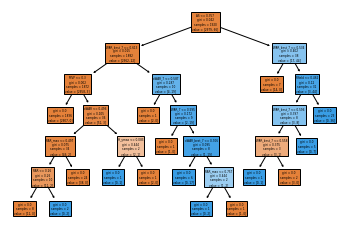

In [ ]:
_ = tree.plot_tree(clf.estimators_[199], feature_names=hof_final_train.drop(columns=['HOF']).columns, filled=True)

In [ ]:
for model in models.keys():    
    hof_final_train[model+'_pred'] = 0
    for i in range(len(hof_final_train)):
        hof_final_train.loc[hof_final_train.index[i],model+'_pred'] = results[model]['y_predictions'][y_index.index(i)]
        hof_final_train.loc[hof_final_train.index[i],model+'_pred_prob'] = results[model]['y_pred_prob'][y_index.index(i)]

In [ ]:
hof_final_train.reset_index(inplace=True)
hof_final_train = hof_final_train.merge(df_bat[['Player', 'Player_name']].drop_duplicates('Player'), on='Player', how='left')
hof_final_train

,Player,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,RAR,WAR,oWAR,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,Rfield,HOF,SVM_pred,SVM_pred_prob,RF_pred,RF_pred_prob,Player_name
0,thondi01,0,0,0,0,0,235,23.8,22.9,21.9,17.8,14.4,19.1,212,71,1,1,6,0,0,0.000969,0,0.0,Dickie Thon
1,greenda01,0,0,0,0,0,162,17.0,16.2,17.0,17.0,16.2,16.2,162,40,0,0,12,0,0,0.002114,0,0.0,Danny Green
2,dropowa01,0,0,0,1,1,42,3.5,3.8,6.8,2.7,4.0,7.0,71,27,1,2,-7,0,0,0.002378,0,0.0,Walt Dropo
3,craftha01,0,0,0,0,0,54,5.2,3.4,5.2,5.2,3.4,3.4,54,32,0,0,21,0,0,0.003090,0,0.0,Harry Craft
4,charlch01,0,0,0,0,0,-14,-2.3,0.9,-2.3,-2.3,0.9,0.9,-14,-2,0,0,-26,0,0,0.004968,0,0.0,Chappy Charles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3378,petrori01,0,0,0,0,0,375,39.0,32.7,33.1,33.1,27.9,28.6,314,95,2,2,67,0,0,0.000177,0,0.0,Rico Petrocelli
3379,lowenjo01,0,0,0,0,1,109,10.0,13.8,12.3,8.5,11.1,13.1,122,36,0,0,-30,0,0,0.002711,0,0.0,John Lowenstein
3380,canneri01,0,0,0,0,0,-12,-1.6,-0.3,-1.6,-1.6,-0.3,-0.3,-12,-2,0,0,-12,0,0,0.004712,0,0.0,Rip Cannell
3381,clarkda05,0,0,0,0,0,10,0.3,3.2,3.6,2.7,4.7,5.1,39,13,0,0,-31,0,0,0.003520,0,0.0,Dave Clark


## False Negatives

In [ ]:
hof_final_train[(hof_final_train['HOF']!=hof_final_train['SVM_pred'])&(hof_final_train['HOF']==1)].set_index('Player_name').sort_values('SVM_pred_prob', ascending=False)

,Player,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,RAR,WAR,oWAR,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,Rfield,HOF,SVM_pred,SVM_pred_prob,RF_pred,RF_pred_prob
Player_name,,,,,,,,,,,,,,,,,,,,,,,
Lou Boudreau,boudrlo01,2,0,0,0,2,616,63.7,51.1,49.3,46.3,37.8,39.3,477,106,7,5,118,1,0,0.307995,0,0.275
Eddie Murray,murraed02,1,0,0,1,2,688,68.6,62.2,39.2,37.7,34.6,36.1,389,71,8,5,61,1,0,0.210249,1,0.530
Gabby Hartnett,hartnga01,0,0,0,0,1,556,56.0,48.7,30.7,26.5,22.5,27.4,312,57,10,8,78,1,0,0.177345,0,0.415
Jim Rice,riceji01,4,2,2,5,3,480,47.8,45.7,36.5,32.4,30.5,34.0,362,73,8,4,24,1,0,0.090715,0,0.120
Willie Stargell,stargwi01,0,2,0,2,1,552,57.5,64.3,38.0,35.7,36.0,39.2,361,72,7,5,-71,1,0,0.083546,0,0.265
Pie Traynor,traynpi01,1,0,0,0,1,380,38.4,42.3,26.8,25.1,26.0,27.6,271,46,10,2,-32,1,0,0.010314,0,0.090
Mickey Cochrane,cochrmi01,0,0,0,0,0,525,49.9,54.1,36.6,36.6,37.6,38.0,390,67,8,3,-40,1,0,0.005895,0,0.145
Lou Brock,brocklo01,4,0,4,0,2,433,45.2,48.8,31.9,30.4,27.5,30.8,293,54,6,6,-50,1,0,0.003380,0,0.040
Tony Pérez,perezto01,1,0,1,1,0,524,54.0,51.0,36.5,36.4,35.3,35.3,341,71,7,4,14,1,0,0.001898,0,0.025


In [ ]:
hof_final_train[(hof_final_train['HOF']!=hof_final_train['RF_pred'])&(hof_final_train['HOF']==1)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

,Player,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,RAR,WAR,oWAR,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,Rfield,HOF,SVM_pred,SVM_pred_prob,RF_pred,RF_pred_prob
Player_name,,,,,,,,,,,,,,,,,,,,,,,
Luis Aparicio,aparilu01,0,0,0,0,0,566,55.8,42.3,32.7,26.8,21.9,24.2,321,56,10,10,149,1,1,0.468661,0,0.485
Larry Walker,walkela01,1,0,1,0,5,744,72.6,62.7,44.6,40.5,36.7,40.4,458,102,5,7,95,1,1,0.784533,0,0.485
Gabby Hartnett,hartnga01,0,0,0,0,1,556,56.0,48.7,30.7,26.5,22.5,27.4,312,57,10,8,78,1,0,0.177345,0,0.415
Hank Greenberg,greenha01,2,5,4,4,4,583,55.7,54.2,46.6,40.6,39.7,44.9,493,82,0,2,17,1,1,0.907214,0,0.385
Jackie Robinson,robinja02,1,0,2,0,5,621,61.8,54.5,51.4,51.0,45.8,45.8,515,95,6,5,81,1,1,0.556279,0,0.340
Lou Boudreau,boudrlo01,2,0,0,0,2,616,63.7,51.1,49.3,46.3,37.8,39.3,477,106,7,5,118,1,0,0.307995,0,0.275
Willie Stargell,stargwi01,0,2,0,2,1,552,57.5,64.3,38.0,35.7,36.0,39.2,361,72,7,5,-71,1,0,0.083546,0,0.265
Ralph Kiner,kinerra01,0,6,1,1,1,484,48.1,53.0,42.8,42.5,45.6,45.6,429,82,6,3,-40,1,1,0.753330,0,0.205
Mickey Cochrane,cochrmi01,0,0,0,0,0,525,49.9,54.1,36.6,36.6,37.6,38.0,390,67,8,3,-40,1,0,0.005895,0,0.145


## SVM and RF Predict Same for Hall of Famers

In [ ]:
hof_final_train[(hof_final_train['SVM_pred']==1)  & (hof_final_train['RF_pred']==1)&(hof_final_train['HOF']==1)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

,Player,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,RAR,WAR,oWAR,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,Rfield,HOF,SVM_pred,SVM_pred_prob,RF_pred,RF_pred_prob
Player_name,,,,,,,,,,,,,,,,,,,,,,,
Frank Robinson,robinfr02,2,1,4,1,4,1033,107.3,106.9,52.8,48.0,47.9,51.1,515,86,12,7,24,1,1,1.000000,1,0.995
Joe DiMaggio,dimagjo01,3,2,3,3,4,825,79.3,74.6,52.2,50.5,46.7,48.6,551,98,13,2,49,1,1,0.999991,1,0.995
Eddie Mathews,matheed01,0,3,3,2,0,946,96.4,94.0,54.1,51.0,49.9,54.1,538,85,9,7,32,1,1,0.999997,1,0.985
Mike Schmidt,schmimi01,0,8,2,3,1,1024,107.0,91.6,58.9,57.4,46.5,49.3,561,94,12,11,128,1,1,0.920474,1,0.980
George Brett,brettge01,3,0,1,1,5,883,88.6,84.8,53.2,47.8,42.2,48.0,528,95,13,8,48,1,1,1.000000,1,0.980
Mel Ott,ottme01,0,1,0,1,0,1102,111.0,106.9,53.6,51.9,48.2,51.1,543,87,13,8,50,1,1,0.999998,1,0.975
Ernie Banks,bankser01,0,4,2,3,0,671,67.9,62.5,52.2,52.2,47.2,47.2,518,99,11,7,55,1,1,0.997336,1,0.975
Carl Yastrzemski,yastrca01,2,1,3,1,3,925,96.4,78.4,55.5,52.4,42.5,46.0,515,112,18,13,183,1,1,0.994980,1,0.975
Al Kaline,kalinal01,3,0,1,1,4,905,92.6,78.9,48.7,43.7,35.0,41.3,475,85,15,12,154,1,1,0.999999,1,0.975


In [ ]:
hof_final_train[(hof_final_train['SVM_pred']==hof_final_train['RF_pred'])&(hof_final_train['HOF']==1)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

,Player,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,RAR,WAR,oWAR,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,Rfield,HOF,SVM_pred,SVM_pred_prob,RF_pred,RF_pred_prob
Player_name,,,,,,,,,,,,,,,,,,,,,,,
Joe DiMaggio,dimagjo01,3,2,3,3,4,825,79.3,74.6,52.2,50.5,46.7,48.6,551,98,13,2,49,1,1,0.999991,1,0.995
Frank Robinson,robinfr02,2,1,4,1,4,1033,107.3,106.9,52.8,48.0,47.9,51.1,515,86,12,7,24,1,1,1.000000,1,0.995
Eddie Mathews,matheed01,0,3,3,2,0,946,96.4,94.0,54.1,51.0,49.9,54.1,538,85,9,7,32,1,1,0.999997,1,0.985
George Brett,brettge01,3,0,1,1,5,883,88.6,84.8,53.2,47.8,42.2,48.0,528,95,13,8,48,1,1,1.000000,1,0.980
Mike Schmidt,schmimi01,0,8,2,3,1,1024,107.0,91.6,58.9,57.4,46.5,49.3,561,94,12,11,128,1,1,0.920474,1,0.980
Carl Yastrzemski,yastrca01,2,1,3,1,3,925,96.4,78.4,55.5,52.4,42.5,46.0,515,112,18,13,183,1,1,0.994980,1,0.975
Ernie Banks,bankser01,0,4,2,3,0,671,67.9,62.5,52.2,52.2,47.2,47.2,518,99,11,7,55,1,1,0.997336,1,0.975
Al Kaline,kalinal01,3,0,1,1,4,905,92.6,78.9,48.7,43.7,35.0,41.3,475,85,15,12,154,1,1,0.999999,1,0.975
Mel Ott,ottme01,0,1,0,1,0,1102,111.0,106.9,53.6,51.9,48.2,51.1,543,87,13,8,50,1,1,0.999998,1,0.975


## SVM and RF Predict Opposite for Hall of Famers

In [ ]:
hof_final_train[(hof_final_train['SVM_pred']!=hof_final_train['RF_pred'])&(hof_final_train['HOF']==1)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

,Player,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,RAR,WAR,oWAR,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,Rfield,HOF,SVM_pred,SVM_pred_prob,RF_pred,RF_pred_prob
Player_name,,,,,,,,,,,,,,,,,,,,,,,
Eddie Murray,murraed02,1,0,0,1,2,688,68.6,62.2,39.2,37.7,34.6,36.1,389,71,8,5,61,1,0,0.210249,1,0.530
Luis Aparicio,aparilu01,0,0,0,0,0,566,55.8,42.3,32.7,26.8,21.9,24.2,321,56,10,10,149,1,1,0.468661,0,0.485
Larry Walker,walkela01,1,0,1,0,5,744,72.6,62.7,44.6,40.5,36.7,40.4,458,102,5,7,95,1,1,0.784533,0,0.485
Hank Greenberg,greenha01,2,5,4,4,4,583,55.7,54.2,46.6,40.6,39.7,44.9,493,82,0,2,17,1,1,0.907214,0,0.385
Jackie Robinson,robinja02,1,0,2,0,5,621,61.8,54.5,51.4,51.0,45.8,45.8,515,95,6,5,81,1,1,0.556279,0,0.340
Ralph Kiner,kinerra01,0,6,1,1,1,484,48.1,53.0,42.8,42.5,45.6,45.6,429,82,6,3,-40,1,1,0.753330,0,0.205


## False Positives

In [ ]:
hof_final_train[(hof_final_train['SVM_pred']!=hof_final_train['RF_pred'])&(hof_final_train['HOF']==0)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

,Player,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,RAR,WAR,oWAR,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,Rfield,HOF,SVM_pred,SVM_pred_prob,RF_pred,RF_pred_prob
Player_name,,,,,,,,,,,,,,,,,,,,,,,
Joe Torre,torrejo01,2,0,0,2,4,545,57.5,59.5,37.2,32.4,36.0,39.9,345,59,9,5,-28,0,0,0.314186,1,0.600
Bobby Grich,grichbo01,0,0,0,0,0,685,71.3,62.7,46.5,40.0,33.7,38.8,438,78,6,4,82,0,0,0.079967,1,0.565
Gary Sheffield,sheffga01,0,0,1,1,2,634,60.4,80.8,38.0,33.2,39.1,44.8,394,71,9,6,-196,0,0,0.240726,1,0.545
Sammy Sosa,sosasa01,1,3,3,4,1,621,58.6,50.5,43.8,41.0,39.2,40.4,462,108,7,8,86,0,1,0.948242,0,0.465
Dale Murphy,murphda05,0,3,2,1,0,460,46.5,48.9,41.2,37.2,38.9,42.3,396,77,7,7,-33,0,1,0.477982,0,0.250


In [ ]:
hof_final_train[(hof_final_train['SVM_pred']!=hof_final_train['HOF'])&(hof_final_train['SVM_pred']==1)].set_index('Player_name').sort_values('SVM_pred_prob', ascending=False)

,Player,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,RAR,WAR,oWAR,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,Rfield,HOF,SVM_pred,SVM_pred_prob,RF_pred,RF_pred_prob
Player_name,,,,,,,,,,,,,,,,,,,,,,,
Pete Rose,rosepe01,12,0,6,0,10,766,79.8,83.2,45.0,42.3,37.0,42.0,420,80,17,10,-55,0,1,0.979614,1,0.950
Todd Helton,heltoto01,2,0,3,2,5,656,61.8,54.6,46.7,45.1,41.4,42.1,487,96,5,6,76,0,1,0.963435,1,0.760
Manny Ramírez,ramirma02,0,0,1,3,5,726,69.4,82.0,40.0,38.6,42.1,43.9,421,80,12,9,-130,0,1,0.960985,1,0.915
Sammy Sosa,sosasa01,1,3,3,4,1,621,58.6,50.5,43.8,41.0,39.2,40.4,462,108,7,8,86,0,1,0.948242,0,0.465
Barry Bonds,bondsba01,0,5,4,1,6,1650,162.8,143.8,72.7,63.0,63.1,70.4,749,127,14,15,175,0,1,0.899361,1,0.985
Ken Boyer,boyerke01,2,0,0,1,2,611,62.9,56.0,46.3,45.1,39.5,40.0,449,80,7,7,74,0,1,0.779423,1,0.680
Shoeless Joe Jackson,jacksjo01,5,0,0,0,6,593,62.3,61.3,52.5,47.3,46.1,50.8,502,93,0,0,11,0,1,0.614828,1,0.720
Dick Allen,allendi01,1,1,2,1,4,544,58.6,70.1,45.8,37.5,45.3,51.8,421,81,7,5,-109,0,1,0.571069,1,0.525
Dale Murphy,murphda05,0,3,2,1,0,460,46.5,48.9,41.2,37.2,38.9,42.3,396,77,7,7,-33,0,1,0.477982,0,0.250


In [ ]:
hof_final_train[(hof_final_train['RF_pred']!=hof_final_train['HOF'])&(hof_final_train['RF_pred']==1)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

,Player,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,RAR,WAR,oWAR,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,Rfield,HOF,SVM_pred,SVM_pred_prob,RF_pred,RF_pred_prob
Player_name,,,,,,,,,,,,,,,,,,,,,,,
Barry Bonds,bondsba01,0,5,4,1,6,1650,162.8,143.8,72.7,63.0,63.1,70.4,749,127,14,15,175,0,1,0.899361,1,0.985
Pete Rose,rosepe01,12,0,6,0,10,766,79.8,83.2,45.0,42.3,37.0,42.0,420,80,17,10,-55,0,1,0.979614,1,0.950
Manny Ramírez,ramirma02,0,0,1,3,5,726,69.4,82.0,40.0,38.6,42.1,43.9,421,80,12,9,-130,0,1,0.960985,1,0.915
Todd Helton,heltoto01,2,0,3,2,5,656,61.8,54.6,46.7,45.1,41.4,42.1,487,96,5,6,76,0,1,0.963435,1,0.760
Shoeless Joe Jackson,jacksjo01,5,0,0,0,6,593,62.3,61.3,52.5,47.3,46.1,50.8,502,93,0,0,11,0,1,0.614828,1,0.720
Ken Boyer,boyerke01,2,0,0,1,2,611,62.9,56.0,46.3,45.1,39.5,40.0,449,80,7,7,74,0,1,0.779423,1,0.680
Joe Torre,torrejo01,2,0,0,2,4,545,57.5,59.5,37.2,32.4,36.0,39.9,345,59,9,5,-28,0,0,0.314186,1,0.600
Bobby Grich,grichbo01,0,0,0,0,0,685,71.3,62.7,46.5,40.0,33.7,38.8,438,78,6,4,82,0,0,0.079967,1,0.565
Gary Sheffield,sheffga01,0,0,1,1,2,634,60.4,80.8,38.0,33.2,39.1,44.8,394,71,9,6,-196,0,0,0.240726,1,0.545


In [ ]:
for model in models.keys():
    if model == 'KNN':
        continue
    print(model)
    TP = len(hof_final_train[(hof_final_train[model+'_pred']==1)&(hof_final_train['HOF']==1)])
    FP = len(hof_final_train[(hof_final_train[model+'_pred']==1)&(hof_final_train['HOF']==0)])
    FN = len(hof_final_train[(hof_final_train[model+'_pred']==0)&(hof_final_train['HOF']==1)])
    precision = np.round_(TP/(TP+FP),2)
    recall = np.round(TP/(TP+FN),2)
    print('TP: ', TP, 'FP:', FP, 'FN:', FN, 'precision:', precision, 'recall:', recall)

SVM
TP:  57 FP: 9 FN: 11 precision: 0.86 recall: 0.84
RF
TP:  53 FP: 10 FN: 15 precision: 0.84 recall: 0.78


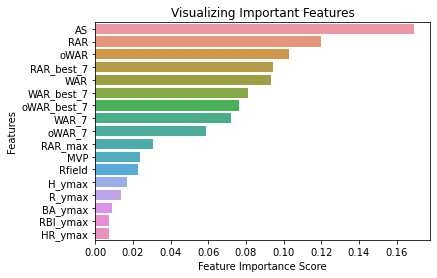

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,
                        index=hof_final_train.columns[1:(1+17)]).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Running on Test Set

In [ ]:
X_train = np.array(hof_final_train.drop(columns=['HOF','SVM_pred','SVM_pred_prob','RF_pred','Player_name','RF_pred_prob']).set_index('Player')) 
y_train = np.array(hof_final_train['HOF'])
X_test = np.array(hof_final_test.drop(columns=['HOF']))
y_test = np.array(hof_final_test['HOF'])
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {'SVM': SVC(C=1, gamma='scale',probability=True, kernel = 'rbf'),'RF':RandomForestClassifier(n_estimators=200,random_state=0)}
test_results = {}

for model in models.keys():
    print('Model: ', model)
    clf = models[model].fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    y_probs = clf.predict_proba(X_test_scaled)
    y_probs = y_probs[:, 1]    
    hof_final_test[model+'_pred'] = y_pred
    hof_final_test[model+'_pred_prob'] = y_probs
    precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
    f1, auc_score = f1_score(y_test, y_pred), auc(recall, precision)    
    print('F1score:', f1, 'AUC:', auc_score)

Model:  SVM
F1score: 0.8387096774193549 AUC: 0.8369287708633109
Model:  RF
F1score: 0.9090909090909091 AUC: 0.9244856066655376


In [ ]:
hof_final_test.reset_index(inplace=True)
hof_final_test = hof_final_test.merge(df_bat[['Player', 'Player_name']].drop_duplicates('Player'), on='Player', how='left')
hof_final_test

,Player,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,RAR,WAR,oWAR,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,Rfield,HOF,SVM_pred,SVM_pred_prob,RF_pred,RF_pred_prob,Player_name
0,bowerfr01,0,0,0,0,0,94,9.5,7.9,9.0,7.6,6.5,7.3,89,15,0,0,21,0,0,0.003001,0,0.00,Frank Bowerman
1,marshji01,0,0,0,0,0,8,0.6,1.7,0.6,0.6,1.7,1.7,8,4,0,0,-11,0,0,0.003541,0,0.00,Jim Marshall
2,molitpa01,7,0,3,0,6,767,75.7,75.4,39.6,35.8,36.2,39.8,402,63,7,9,7,1,1,0.988363,1,0.57,Paul Molitor
3,sisledi01,0,0,0,0,0,77,7.2,7.9,7.7,7.4,8.1,8.4,82,35,1,2,-4,0,0,0.001802,0,0.00,Dick Sisler
4,cobbty01,11,1,8,5,15,1433,151.7,151.9,69.1,62.8,62.1,67.6,639,108,0,2,0,1,1,0.835978,1,0.81,Ty Cobb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,stallvi01,0,0,0,0,0,-22,-2.9,-1.6,-2.9,-2.9,-1.6,-1.6,-22,0,0,0,-9,0,0,0.004434,0,0.00,Virgil Stallcup
842,ankieri01,0,0,0,0,0,61,5.5,5.0,6.4,6.4,5.1,5.3,68,22,0,0,4,0,0,0.002659,0,0.00,Rick Ankiel
843,heathcl01,0,0,0,0,0,105,11.0,6.3,10.4,7.5,4.5,6.9,103,30,0,0,51,0,0,0.002911,0,0.00,Cliff Heathcote
844,glennjo01,0,0,0,0,0,7,0.7,0.6,0.7,0.7,0.6,0.6,7,14,0,0,2,0,0,0.003136,0,0.00,John Glenn


## False Negatives

In [ ]:
hof_final_test[(hof_final_test['HOF']!=hof_final_test['SVM_pred'])&(hof_final_test['HOF']==1)].set_index('Player_name').sort_values('SVM_pred_prob', ascending=False)

,Player,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,RAR,WAR,oWAR,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,Rfield,HOF,SVM_pred,SVM_pred_prob,RF_pred,RF_pred_prob
Player_name,,,,,,,,,,,,,,,,,,,,,,,
Frank Thomas,thomafr04,0,0,2,3,4,768,73.9,80.6,45.5,44.8,50.0,50.0,473,76,5,6,-67,1,0,0.348797,1,0.785
Harry Heilmann,heilmha01,3,0,0,1,5,739,72.4,77.3,47.4,47.4,49.3,49.3,489,96,0,2,-44,1,0,0.298221,1,0.865
George Sisler,sislege01,4,0,2,1,5,531,54.6,54.2,47.1,47.1,43.7,43.7,457,101,0,0,6,1,0,0.080617,0,0.480
Willie Keeler,keelewi01,4,0,2,0,3,318,31.5,33.2,26.6,26.0,25.4,25.8,264,46,0,0,-4,1,0,0.002019,0,0.015


In [ ]:
hof_final_test[(hof_final_test['HOF']!=hof_final_test['RF_pred'])&(hof_final_test['HOF']==1)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

,Player,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,RAR,WAR,oWAR,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,Rfield,HOF,SVM_pred,SVM_pred_prob,RF_pred,RF_pred_prob
Player_name,,,,,,,,,,,,,,,,,,,,,,,
George Sisler,sislege01,4,0,2,1,5,531,54.6,54.2,47.1,47.1,43.7,43.7,457,101,0,0,6,1,0,0.080617,0,0.480
Willie Keeler,keelewi01,4,0,2,0,3,318,31.5,33.2,26.6,26.0,25.4,25.8,264,46,0,0,-4,1,0,0.002019,0,0.015


In [ ]:
hof_final_test[(hof_final_test['SVM_pred']!=hof_final_test['RF_pred'])&(hof_final_test['HOF']==1)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

,Player,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,RAR,WAR,oWAR,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,Rfield,HOF,SVM_pred,SVM_pred_prob,RF_pred,RF_pred_prob
Player_name,,,,,,,,,,,,,,,,,,,,,,,
Harry Heilmann,heilmha01,3,0,0,1,5,739,72.4,77.3,47.4,47.4,49.3,49.3,489,96,0,2,-44,1,0,0.298221,1,0.865
Frank Thomas,thomafr04,0,0,2,3,4,768,73.9,80.6,45.5,44.8,50.0,50.0,473,76,5,6,-67,1,0,0.348797,1,0.785


In [ ]:
hof_final_test[(hof_final_test['SVM_pred']==1) & (hof_final_test['RF_pred']==1) & (hof_final_test['HOF']==1)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

,Player,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,RAR,WAR,oWAR,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,Rfield,HOF,SVM_pred,SVM_pred_prob,RF_pred,RF_pred_prob
Player_name,,,,,,,,,,,,,,,,,,,,,,,
Jimmie Foxx,foxxji01,3,4,4,3,5,997,92.3,90.4,58.1,55.3,52.4,56.7,629,115,13,5,19,1,1,0.997391,1,0.995
Rickey Henderson,henderi01,1,0,7,0,2,1121,111.1,105.3,57.6,51.8,44.8,48.3,566,100,10,7,67,1,1,0.999982,1,0.990
Nap Lajoie,lajoina01,6,0,1,5,6,1020,107.2,98.0,60.0,53.3,44.3,52.0,548,93,0,2,83,1,1,0.899201,1,0.920
Honus Wagner,wagneho01,4,0,5,6,7,1240,131.0,123.5,65.4,65.0,61.5,61.8,593,97,0,0,85,1,1,0.923374,1,0.900
Tris Speaker,speaktr01,5,0,2,1,10,1289,134.8,124.7,62.6,58.2,53.5,59.3,596,100,0,1,92,1,1,0.970006,1,0.900
Ty Cobb,cobbty01,11,1,8,5,15,1433,151.7,151.9,69.1,62.8,62.1,67.6,639,108,0,2,0,1,1,0.835978,1,0.810
Brooks Robinson,robinbr01,2,0,0,1,3,756,78.4,47.8,45.9,42.2,29.3,31.3,429,78,15,12,294,1,1,0.994415,1,0.750
Craig Biggio,biggicr01,1,0,3,0,0,686,65.5,76.4,41.8,41.7,41.6,42.1,436,97,7,5,-101,1,1,0.792996,1,0.695
Babe Ruth,ruthba01,2,11,10,9,6,1704,163.1,154.8,85.5,73.0,69.5,80.3,903,147,5,0,79,1,1,0.769914,1,0.620


## False Positives

In [ ]:
hof_final_test[((hof_final_test['SVM_pred']==1) | (hof_final_test['RF_pred']==1))&(hof_final_test['HOF']==0)].set_index('Player_name').sort_values('RF_pred_prob', ascending=False)

,Player,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,RAR,WAR,oWAR,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,Rfield,HOF,SVM_pred,SVM_pred_prob,RF_pred,RF_pred_prob
Player_name,,,,,,,,,,,,,,,,,,,,,,,
Mark McGwire,mcgwima01,0,6,1,1,0,649,62.2,65.7,41.9,35.4,39.5,45.8,437,79,12,9,-29,0,1,0.995941,1,0.8


## Final Results

In [ ]:
for model in models.keys():
    print(model)
    TP = len(hof_final_test[(hof_final_test[model+'_pred']==1)&(hof_final_test['HOF']==1)])
    FP = len(hof_final_test[(hof_final_test[model+'_pred']==1)&(hof_final_test['HOF']==0)])
    FN = len(hof_final_test[(hof_final_test[model+'_pred']==0)&(hof_final_test['HOF']==1)])
    precision = np.round_(TP/(TP+FP),2)
    recall = np.round(TP/(TP+FN),2)
    print('TP: ', TP, 'FP:', FP, 'FN:', FN, 'precision:', precision, 'recall:', recall)

SVM
TP:  13 FP: 1 FN: 4 precision: 0.93 recall: 0.76
RF
TP:  15 FP: 1 FN: 2 precision: 0.94 recall: 0.88


## Current Players

In [ ]:
def data_prep(df_main, features):
    df = df_main.copy()
    col_avail = [x for x in features if x in df.columns]
    col_add = [x for x in features if x not in df.columns]
    for col in col_add:          
        if col == 'AS' or col == 'MVP':
            df[col] = df['Player'].apply(lambda x:awards(x,col,n=10))            
            continue
        info = col.split('_')
        if info[-1].isnumeric() and 'best' not in info:
            df[col]= df['Player'].apply(lambda x:rolling_max(x,int(info[-1]),info[0]))
        elif info[-1].isnumeric():
            df[col]= df['Player'].apply(lambda x:bestof(x,int(info[-1]),info[0]))
        elif info[-1] == 'BA':
            df[col] = np.where(((df['H']>3000)&(df['BA']>0.300)),1,0)
        elif info[-1] == 'ymax':
            df[col] = df['Player'].apply(lambda x:year_max(x,info[0]))        
        elif info[-1] == 'max':
            df[col] = df['Player'].apply(lambda x:col_max(x,info[0]))
    df = df[['Player']+col_add+col_avail]
    if 'HOF' in col_avail:
        df.drop(columns=['HOF'], inplace=True)
    df.set_index('Player', inplace=True)
    return df

In [ ]:
df_current = career_stats(df_bat)
df_current = df_current[['Player'] + ['G', 'AB', 'R', 'H','2B','3B', 'HR','RBI', 'SB','BA', 'SLG','OPS', 'TB','Rbat','WAA','RAR','oRAR','RE24','Pos_mean','HOF','WAR','oWAR', 'Rbat+','Rfield','Rbaser','last_game']] #'BB', 'SO', 'SB'
df_current = df_current.merge(df_bat[['Player', 'Player_name']].drop_duplicates('Player'),how='left', on='Player')
df_current = df_current[df_current['last_game']>2015]
df_current.reset_index(drop=True, inplace=True)
df_current.dropna(inplace=True)
df_current

,Player,G,AB,R,H,2B,3B,HR,RBI,SB,BA,SLG,OPS,TB,Rbat,WAA,RAR,oRAR,RE24,Pos_mean,HOF,WAR,oWAR,Rbat+,Rfield,Rbaser,last_game,Player_name
0,abreujo02,1058,4143.0,577.0,1201.0,250.0,16.0,216.0,747.0,11.0,0.289887,0.514362,0.845199,2131.0,187,10.4,251,262,205.2,0.848771,0,26.0,26.7,137.125000,-11,-9,2021,José Abreu
1,ackledu01,635,2125.0,261.0,512.0,94.0,18.0,46.0,216.0,31.0,0.240941,0.367059,0.669414,780.0,-21,-0.5,76,68,-7.4,5.486614,0,7.8,6.7,81.333333,9,2,2016,Dustin Ackley
2,acunaro01,395,1516.0,323.0,426.0,78.0,7.0,105.0,246.0,78.0,0.281003,0.549472,0.910726,833.0,81,9.2,152,136,101.9,3.959494,0,14.6,13.5,144.250000,15,8,2021,Ronald Acuña Jr.
3,adamewi01,392,1355.0,196.0,355.0,71.0,3.0,55.0,165.0,15.0,0.261993,0.440590,0.769485,597.0,22,5.9,109,99,-4.5,13.535714,0,11.1,9.9,115.250000,10,2,2021,Willy Adames
4,adamsma01,856,2421.0,297.0,624.0,130.0,6.0,118.0,399.0,4.0,0.257745,0.462619,0.766314,1120.0,3,-3.5,59,49,40.7,0.670561,0,4.7,4.0,84.700000,11,-10,2021,Matt Adams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,younger03,645,1724.0,273.0,422.0,67.0,22.0,13.0,112.0,161.0,0.244780,0.331787,0.628141,572.0,-52,-4.7,22,24,-14.1,3.031008,0,1.4,1.7,69.000000,-4,19,2018,Eric Young Jr.
661,zimmebr01,213,591.0,78.0,136.0,23.0,3.0,13.0,66.0,30.0,0.230118,0.345178,0.636032,204.0,-20,-0.1,23,17,-17.2,4.671362,0,2.4,1.8,50.400000,6,6,2021,Bradley Zimmer
662,zimmery01,1761,6579.0,956.0,1826.0,409.0,22.0,281.0,1048.0,43.0,0.277550,0.474540,0.814584,3122.0,143,17.5,413,361,195.0,4.748438,0,39.7,34.9,117.062500,50,10,2021,Ryan Zimmerman
663,zobribe01,1651,5880.0,884.0,1566.0,349.0,44.0,167.0,768.0,116.0,0.266327,0.425850,0.780112,2504.0,124,21.5,440,389,151.1,6.477892,0,44.6,39.3,103.857143,51,10,2019,Ben Zobrist


In [ ]:
features = list(hof_final_train.drop(columns=['SVM_pred', 'SVM_pred_prob', 'RF_pred', 'RF_pred_prob', 'Player', 'Player_name']).columns)
df_prep = data_prep(df_current, features)
df_prep

#df_prep.to_csv('df_prep.csv')

#df_prep = pd.read_csv('asset/df_prep.csv', index_col=0)
df_prep

,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,RAR,WAR,oWAR,Rfield
Player,,,,,,,,,,,,,,,,,
abreujo02,1,1,0,4,1,24.6,24.6,25.5,25.5,238,54,3,5,251,26.0,26.7,-11
ackledu01,0,0,0,0,0,7.8,7.8,6.7,6.7,76,36,0,0,76,7.8,6.7,9
acunaro01,0,0,2,0,0,14.6,14.6,13.5,13.5,152,53,2,3,152,14.6,13.5,15
adamewi01,0,0,0,0,0,11.1,11.1,9.9,9.9,109,40,0,0,109,11.1,9.9,10
adamsma01,0,0,0,0,0,5.6,5.6,5.0,5.0,67,24,0,0,59,4.7,4.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
younger03,0,0,0,0,0,2.5,2.2,2.3,2.5,29,17,0,0,22,1.4,1.7,-4
zimmebr01,0,0,0,0,0,2.4,2.4,1.8,1.8,23,16,0,0,23,2.4,1.8,6
zimmery01,0,0,0,0,0,31.2,30.2,25.2,27.4,317,73,2,4,413,39.7,34.9,50


In [ ]:
X_train = np.array(hof_final_train.drop(columns=['HOF','SVM_pred','SVM_pred_prob','RF_pred','RF_pred_prob','Player_name']).set_index('Player'))
y_train = np.array(hof_final_train['HOF'])

X_test = np.array(df_prep)
                  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
                  
## RFC parameters from above
clf = RandomForestClassifier(n_estimators=200,random_state=0)
clf.fit(X_train_scaled,y_train)

df_prep['RF_pred'] = clf.predict(X_test_scaled)
y_probs = clf.predict_proba(X_test_scaled)

df_prep['RF_pred_prob'] = y_probs[:,1]
df_prep.reset_index(inplace=True)

df_prep = df_prep.merge(df_bat[['Player', 'Player_name']].drop_duplicates('Player'),how='left', on='Player')
df_prep

,Player,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max,AS,MVP,RAR,WAR,oWAR,Rfield,RF_pred,RF_pred_prob,Player_name
0,abreujo02,1,1,0,4,1,24.6,24.6,25.5,25.5,238,54,3,5,251,26.0,26.7,-11,0,0.380,José Abreu
1,ackledu01,0,0,0,0,0,7.8,7.8,6.7,6.7,76,36,0,0,76,7.8,6.7,9,0,0.280,Dustin Ackley
2,acunaro01,0,0,2,0,0,14.6,14.6,13.5,13.5,152,53,2,3,152,14.6,13.5,15,0,0.390,Ronald Acuña Jr.
3,adamewi01,0,0,0,0,0,11.1,11.1,9.9,9.9,109,40,0,0,109,11.1,9.9,10,0,0.385,Willy Adames
4,adamsma01,0,0,0,0,0,5.6,5.6,5.0,5.0,67,24,0,0,59,4.7,4.0,11,0,0.120,Matt Adams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,younger03,0,0,0,0,0,2.5,2.2,2.3,2.5,29,17,0,0,22,1.4,1.7,-4,0,0.000,Eric Young Jr.
661,zimmebr01,0,0,0,0,0,2.4,2.4,1.8,1.8,23,16,0,0,23,2.4,1.8,6,0,0.000,Bradley Zimmer
662,zimmery01,0,0,0,0,0,31.2,30.2,25.2,27.4,317,73,2,4,413,39.7,34.9,50,0,0.400,Ryan Zimmerman
663,zobribe01,0,0,0,0,0,39.7,38.7,31.7,32.8,388,88,3,2,440,44.6,39.3,51,0,0.440,Ben Zobrist


In [ ]:
dfFinal = df_prep.sort_values(by='RF_pred_prob',ascending=False).drop(columns=['Player'])
dfFinal = dfFinal[(dfFinal['RF_pred_prob']>=0.47)].set_index('Player_name')
dfFinal[dfFinal.columns.tolist()[11:]+dfFinal.columns.tolist()[:11]]

,AS,MVP,RAR,WAR,oWAR,Rfield,RF_pred,RF_pred_prob,H_ymax,HR_ymax,R_ymax,RBI_ymax,BA_ymax,WAR_best_7,WAR_7,oWAR_7,oWAR_best_7,RAR_best_7,RAR_max
Player_name,,,,,,,,,,,,,,,,,,,
Álex Rodríguez,14,15,1225,117.7,115.3,23,1,0.655,2,4,7,3,3,64.3,57.7,56.3,62.0,681,114
Albert Pujols,10,9,1008,99.3,85.1,139,1,0.650,1,3,6,4,6,61.7,61.7,51.5,52.5,636,98
Mike Trout,9,8,751,75.9,75.9,-5,1,0.645,1,1,3,1,4,64.9,64.0,62.7,63.5,638,105
Miguel Cabrera,11,11,687,69.1,79.0,-99,1,0.525,3,1,1,4,9,44.8,43.8,47.1,49.5,449,76
Robinson Canó,8,6,684,69.3,68.7,6,0,0.500,5,0,0,1,4,49.2,46.0,42.8,43.0,481,83
Mookie Betts,5,6,486,49.3,35.9,128,0,0.490,2,0,4,0,2,47.0,47.0,34.1,34.1,465,106
Andrew McCutchen,5,4,464,46.0,55.1,-83,0,0.480,1,0,0,0,3,38.3,37.6,41.7,42.3,380,75
Chase Utley,6,5,660,64.5,51.5,131,0,0.475,1,0,3,0,1,49.2,49.2,36.5,37.7,502,93
Joey Votto,6,3,633,62.5,57.7,50,0,0.470,0,0,1,0,5,46.8,40.9,37.3,42.4,464,83


## Predicting HoF Throughout a Player Career

In [ ]:
dfCareer = career_stats(df_bat)
dfCareer = dfCareer[dfCareer['HOF']==1]
players = dfCareer['Player'].tolist()
df_bat2 = df_bat[df_bat['Player'].isin(players)]
df_bat2

,Year,Age,Tm,Lg,G_bat,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos_bat,Awards,marker,G,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR,Salary,rOBA,Rbat+,BAbip,ISO,HR%,SO%,BB%,WPA,cWPA,RE24,RS%,SB%,XBT%,Pos,GS,CG,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,RF/9,RF/G,lgFld%,lgRF9,lgRFG,Pos_2,Pos_adjust,Pos_mean,Player,Player_name,Season,HOF,Type,last_game,LD%,GB%,FB%,GB/FB,Pull%,Cent%,Oppo%,Rdrs,Rdrs/yr,EV,HardH%,PB,WP,CS%,lgCS%,LF-CF-RF
0,1954.0,20,MLN,NL,122.0,509.0,468.0,58.0,131.0,27.0,6.0,13.0,69.0,2.0,2.0,28.0,39.0,0.280,0.322,0.447,0.769,104.0,209.0,13.0,3.0,6.0,4.0,0.0,*79/H,RoY-4,1,122,5,-2,-1,-1,-5,-4,-0.5,19,16,1.4,0.497,0.498,1.6,-0.7,17,6000.0,0.356,109.0,0.281,0.167,2.6,7.7,5.5,1.0,1.1%,7.6,30.0,50.0,51.0,OF,113.0,111.0,1031.0,235.0,223.0,5.0,7.0,0.0,0.970,-1.0,-1.0,1.99,1.97,0.975,2.36,2.34,4,464,3.094828,aaronha01,Henry Aaron,1,1,Rightfielder and First Baseman,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1955.0,21,MLN,NL,153.0,665.0,602.0,105.0,189.0,37.0,9.0,27.0,106.0,3.0,1.0,49.0,61.0,0.314,0.366,0.540,0.906,141.0,325.0,20.0,3.0,7.0,4.0,5.0,*974/H,"AS,MVP-9",1,153,37,2,-1,7,-5,40,3.8,25,65,6.2,0.527,0.525,5.8,0.0,58,10000.0,0.406,149.0,0.313,0.226,4.1,9.2,7.4,1.6,0.8%,31.7,36.0,75.0,47.0,OF,125.0,113.0,1109.2,272.0,254.0,9.0,9.0,2.0,0.967,7.0,8.0,2.13,2.09,0.977,2.30,2.28,4,504,4.987578,aaronha01,Henry Aaron,2,1,Rightfielder and First Baseman,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1956.0,22,MLN,NL,153.0,660.0,609.0,106.0,200.0,34.0,14.0,26.0,92.0,2.0,4.0,37.0,54.0,0.328,0.365,0.558,0.923,151.0,340.0,21.0,2.0,5.0,7.0,6.0,*9/H,"AS,MVP-3",1,153,41,0,-1,15,-7,47,4.6,24,72,7.2,0.533,0.531,6.0,0.7,57,17500.0,0.402,157.0,0.325,0.230,3.9,8.2,5.6,3.9,22.6%,23.6,38.0,33.0,53.0,OF,152.0,148.0,1349.1,346.0,316.0,17.0,13.0,4.0,0.962,15.0,13.0,2.22,2.19,0.977,2.28,2.25,4,608,4.000000,aaronha01,Henry Aaron,3,1,Rightfielder and First Baseman,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1957.0,23,MLN,NL,151.0,675.0,615.0,118.0,198.0,27.0,6.0,44.0,132.0,1.0,1.0,57.0,58.0,0.322,0.378,0.600,0.978,166.0,369.0,13.0,0.0,0.0,3.0,15.0,*98/H,"AS,MVP-1",1,151,53,2,0,4,-4,55,5.5,25,80,8.0,0.538,0.535,7.8,-0.1,75,22500.0,0.428,173.0,0.298,0.278,6.5,8.6,8.4,7.0,19.4%,73.1,35.0,50.0,51.0,OF,150.0,144.0,1356.1,361.0,346.0,9.0,6.0,0.0,0.983,4.0,4.0,2.36,2.37,0.980,2.29,2.31,4,600,4.450980,aaronha01,Henry Aaron,4,1,Rightfielder and First Baseman,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1958.0,24,MLN,NL,153.0,664.0,601.0,109.0,196.0,34.0,4.0,30.0,95.0,4.0,1.0,59.0,49.0,0.326,0.386,0.546,0.931,153.0,328.0,21.0,1.0,0.0,3.0,16.0,*98,"AS,MVP-3,GG",1,153,44,4,-2,8,-6,48,4.8,25,72,7.3,0.532,0.531,6.6,0.2,64,35000.0,0.416,160.0,0.316,0.220,4.5,7.4,8.9,3.4,13.7%,37.2,35.0,80.0,57.0,OF,153.0,147.0,1361.0,322.0,305.0,12.0,5.0,0.0,0.984,8.0,7.0,2.10,2.07,0.980,2.26,2.25,4,612,4.246835,aaronha01,Henry Aaron,5,1,Rightfielder and First Baseman,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42842,1989.0,33,MIL,AL,160.0,690.0,614.0,101.0,195.0,38.0,9.0,21.0,103.0,19.0,3.0,63.0,71.0,0.318,0.384,0.511,0.896,152.0,314.0,9.0,6.0,3.0,4.0,9.0,*8D,"MVP-1,SS",1,160,40,3,2,-14,1,32,3.5,24,56,5.8,0.521,0.521,7.3,-1.3,71,1150000.0,0.411,154.0,0.331,0.194,3.0,10.3,9.1,3.8,1.0%,49.2,33.0,86.0,45.0,CF,144.0,128.0,1231.2,381.0,367.0,8.0,6.0,2.0,0.984,-14.0,-14.0,2.74,2.60,0.984,2.78,2.75,5,720,4.500000,yountro01,Robin Yount,16,1,Shortstop and Centerfielder,1993,23.5,42.2,28.4,1.

In [ ]:
features = ['H_ymax','HR_ymax','R_ymax','RBI_ymax','BA_ymax','RAR','WAR','oWAR','WAR_best_7','WAR_7',
            'oWAR_7','oWAR_best_7','RAR_best_7','RAR_max','AS','MVP','Rfield','HOF']

In [ ]:
def player_stats(main, features, clf, predType = 'binary', df = df_bat):    
    player_main = career_stats(df)[['Player']]
    player_main = player_main.merge(df[['Player', 'Player_name']].drop_duplicates('Player'),how='left', on='Player')

    col_avail = [x for x in features if x in df.columns]
    col_add = [x for x in features if x not in df.columns]
    req_extra = ['last_game','HR', 'AB', '2B', '3B', 'H','R', 'RBI', 'G','BA', 'TB']
    col_extra = [x for x in req_extra if x not in col_avail]
    season_max = df[['Player', main]].groupby(['Player']).agg('max').reset_index()
    start = min(df[main])
    if main == 'Season':
        start = 1
    for i in range(start, max(df[main])+1):
        print(main+ ' '+str(i))
        temp_main = df[df[main]<=i]
        temp_main = temp_main[temp_main['Player'].isin(player_main['Player'])]
        temp_main = temp_main[temp_main['Player'].isin(season_max[season_max[main]>=i]['Player'])]
        temp = career_stats(temp_main)
        temp_main = temp_main[['Player'] + col_avail+col_extra+['Pos_adjust','Year','Awards']]
        temp = temp[['Player'] + col_avail+col_extra]
        temp = temp.merge(df[['Player', 'Player_name']].drop_duplicates('Player'),how='left', on='Player')
        temp.reset_index(drop=True, inplace=True)
        temp.dropna(inplace=True)    
        for col in col_add:          
            if col == 'AS' or col == 'MVP':
                temp[col] = temp['Player'].apply(lambda x:awards(x,col,df=temp_main,n=10))            
                continue
            info = col.split('_')
            if info[-1].isnumeric() and 'best' not in info:
                temp[col]= temp['Player'].apply(lambda x:rolling_max(x,int(info[-1]),info[0], df=temp_main))
            elif info[-1].isnumeric():
                temp[col]= temp['Player'].apply(lambda x:bestof(x,int(info[-1]),info[0], df=temp_main))
            elif info[-1] == 'ymax':
                temp[col] = temp['Player'].apply(lambda x:year_max(x,info[0],df = temp_main))        
            elif info[-1] == 'max':
                temp[col] = temp['Player'].apply(lambda x:col_max(x,info[0],df = temp_main))
        temp.drop(columns=col_extra, inplace=True)    
        temp.dropna(inplace=True)
        X = np.array(temp[col_add+col_avail].drop(columns=['HOF']))
        if X.shape[0]==0:
            continue
        x_scaled = scaler.transform(X)
        
        if predType == 'binary':
            y_probs = clf.predict(x_scaled)
        elif predType == 'proba':
            y_probs = clf.predict_proba(x_scaled)
            y_probs = y_probs[:, 1]
            
        temp[str(i)] = y_probs
        player_main = player_main.merge(temp[['Player',str(i)]], on='Player', how='left')
        player_main
    return player_main

playerSeasonFullValue = player_stats('Season', features, clf, predType = 'proba', df = df_bat)
playerSeasonFullBinary = player_stats('Season', features, clf, predType = 'binary', df = df_bat)
playerSeasonFullValue.to_csv('playerSeasonFullValueHOF.csv')
playerSeasonFullBinary.to_csv('playerSeasonFullBinaryHOF.csv')
playerAgeFullValue = player_stats('Age', features, clf, predType = 'proba', df = df_bat)
playerAgeFullBinary = player_stats('Age', features, clf, predType = 'binary', df = df_bat)
playerAgeFullValue.to_csv('playerAgeFullValueHOF.csv')
playerAgeFullBinary.to_csv('playerAgeFullBinaryHOF.csv')

Season 1
Season 2
Season 3
Season 4
Season 5
Season 6
Season 7
Season 8
Season 9
Season 10
Season 11
Season 12
Season 13
Season 14
Season 15
Season 16
Season 17
Season 18
Season 19
Season 20
Season 21
Season 22
Season 23
Season 24
Season 25
Season 1
Season 2
Season 3
Season 4
Season 5
Season 6
Season 7
Season 8
Season 9
Season 10
Season 11
Season 12
Season 13
Season 14
Season 15
Season 16
Season 17
Season 18
Season 19
Season 20
Season 21
Season 22
Season 23
Season 24
Season 25
Age 16
Age 17
Age 18
Age 19
Age 20
Age 21
Age 22
Age 23
Age 24
Age 25
Age 26
Age 27
Age 28
Age 29
Age 30
Age 31
Age 32
Age 33
Age 34
Age 35
Age 36
Age 37
Age 38
Age 39
Age 40
Age 41
Age 42
Age 43
Age 44
Age 45
Age 46
Age 47
Age 48
Age 49
Age 50
Age 51
Age 52
Age 53
Age 16
Age 17
Age 18
Age 19
Age 20
Age 21
Age 22
Age 23
Age 24
Age 25
Age 26
Age 27
Age 28
Age 29
Age 30
Age 31
Age 32
Age 33
Age 34
Age 35
Age 36
Age 37
Age 38
Age 39
Age 40
Age 41
Age 42
Age 43
Age 44
Age 45
Age 46
Age 47
Age 48
Age 49
Age 50
Age 51


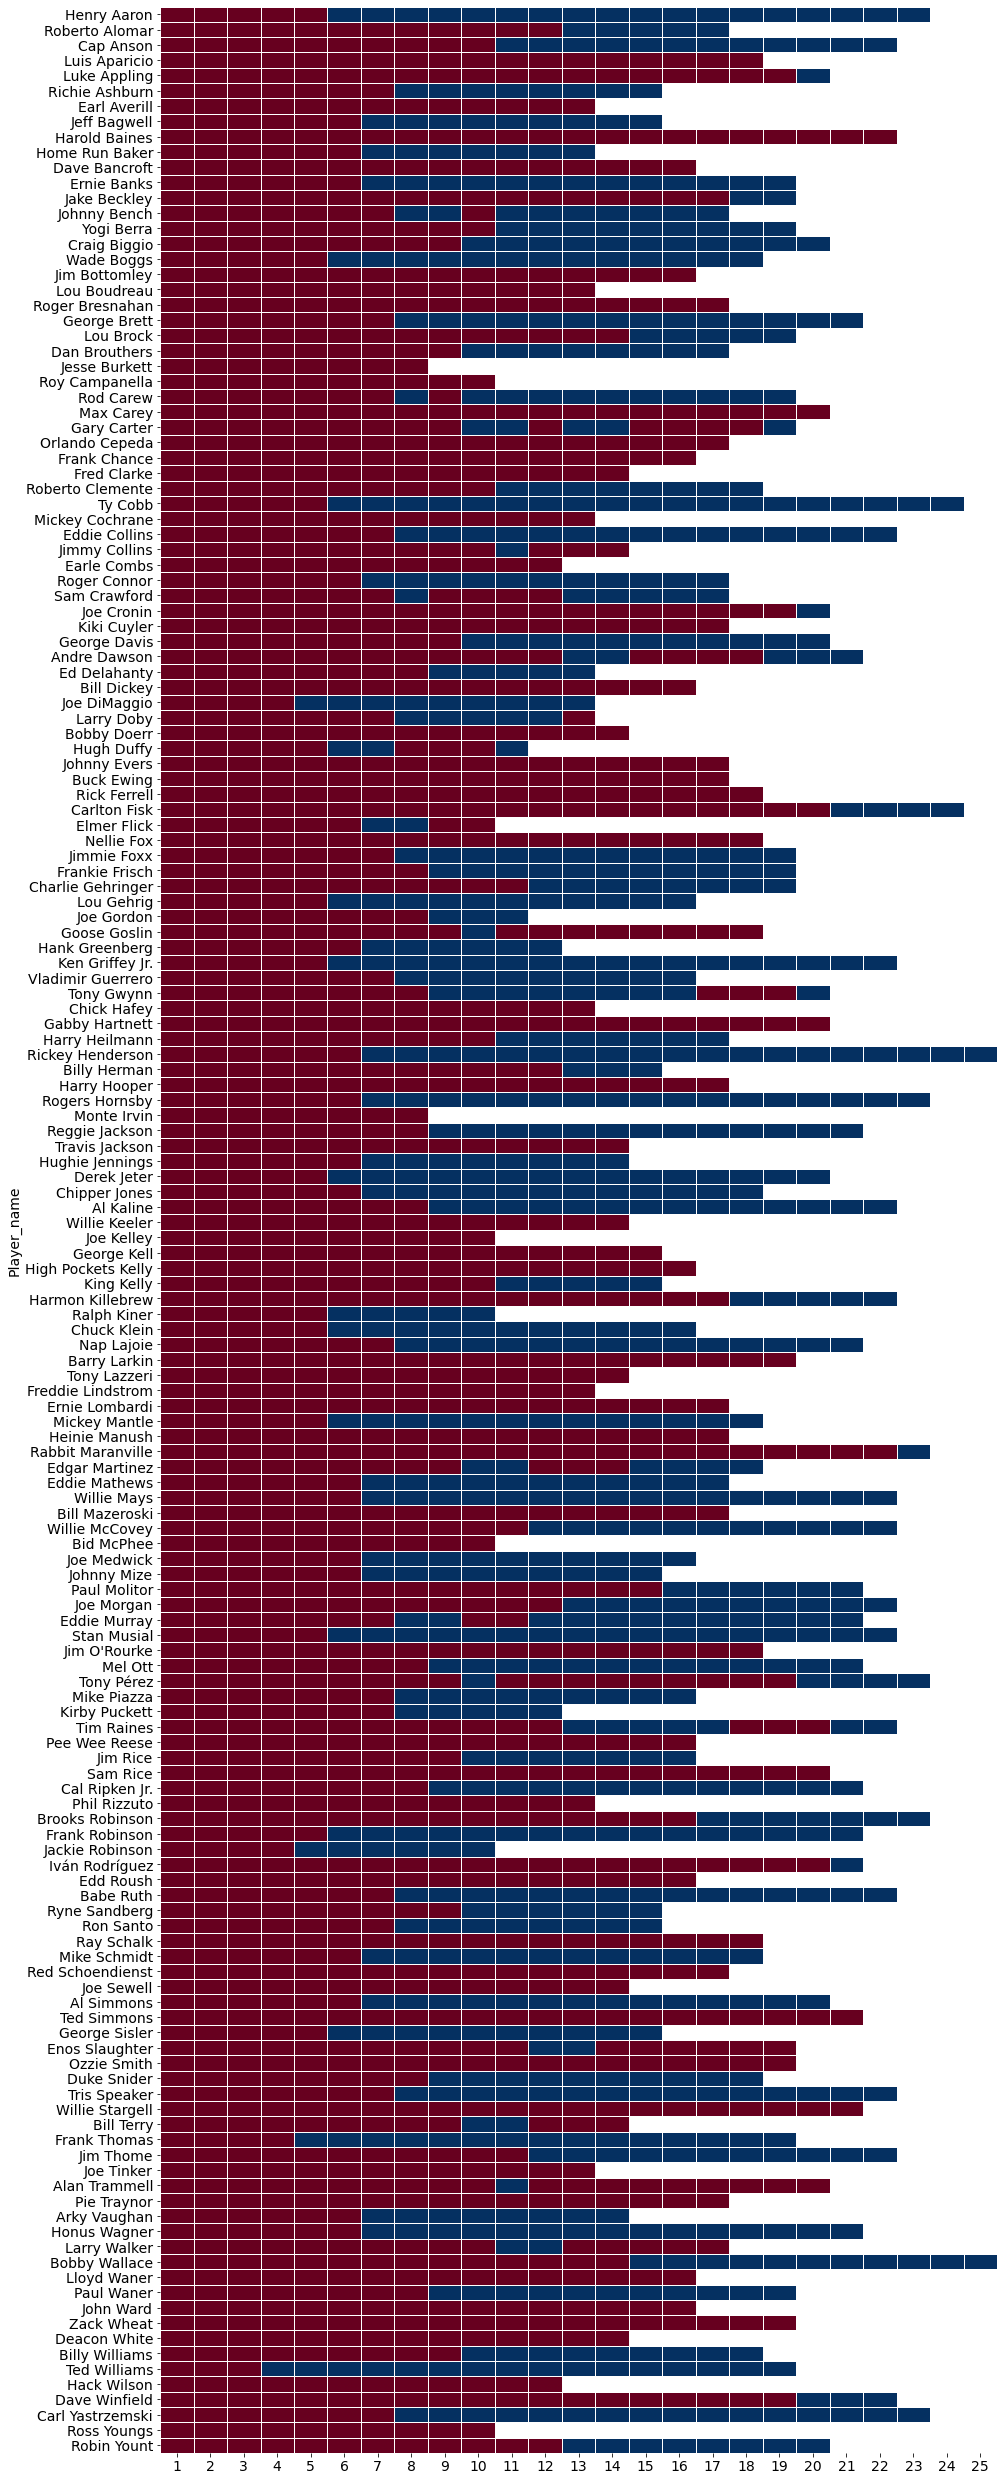

In [ ]:
playerSeasonFullBinary = pd.read_csv('asset/playerSeasonFullBinaryHOF.csv', index_col=0)

plt.figure(figsize = (15,45))
pf = playerSeasonFullBinary.reset_index()
pf.set_index('Player_name', inplace=True)
pf.drop(['Billy Hamilton', 'Sam Thompson', 'Tommy McCarthy'], axis=0, inplace=True)
pf.drop(columns = ['index', 'Player'], axis=1, inplace=True)
ax = sns.heatmap(pf, linewidths=.5,cmap="RdBu", cbar=False, center = 0.5)

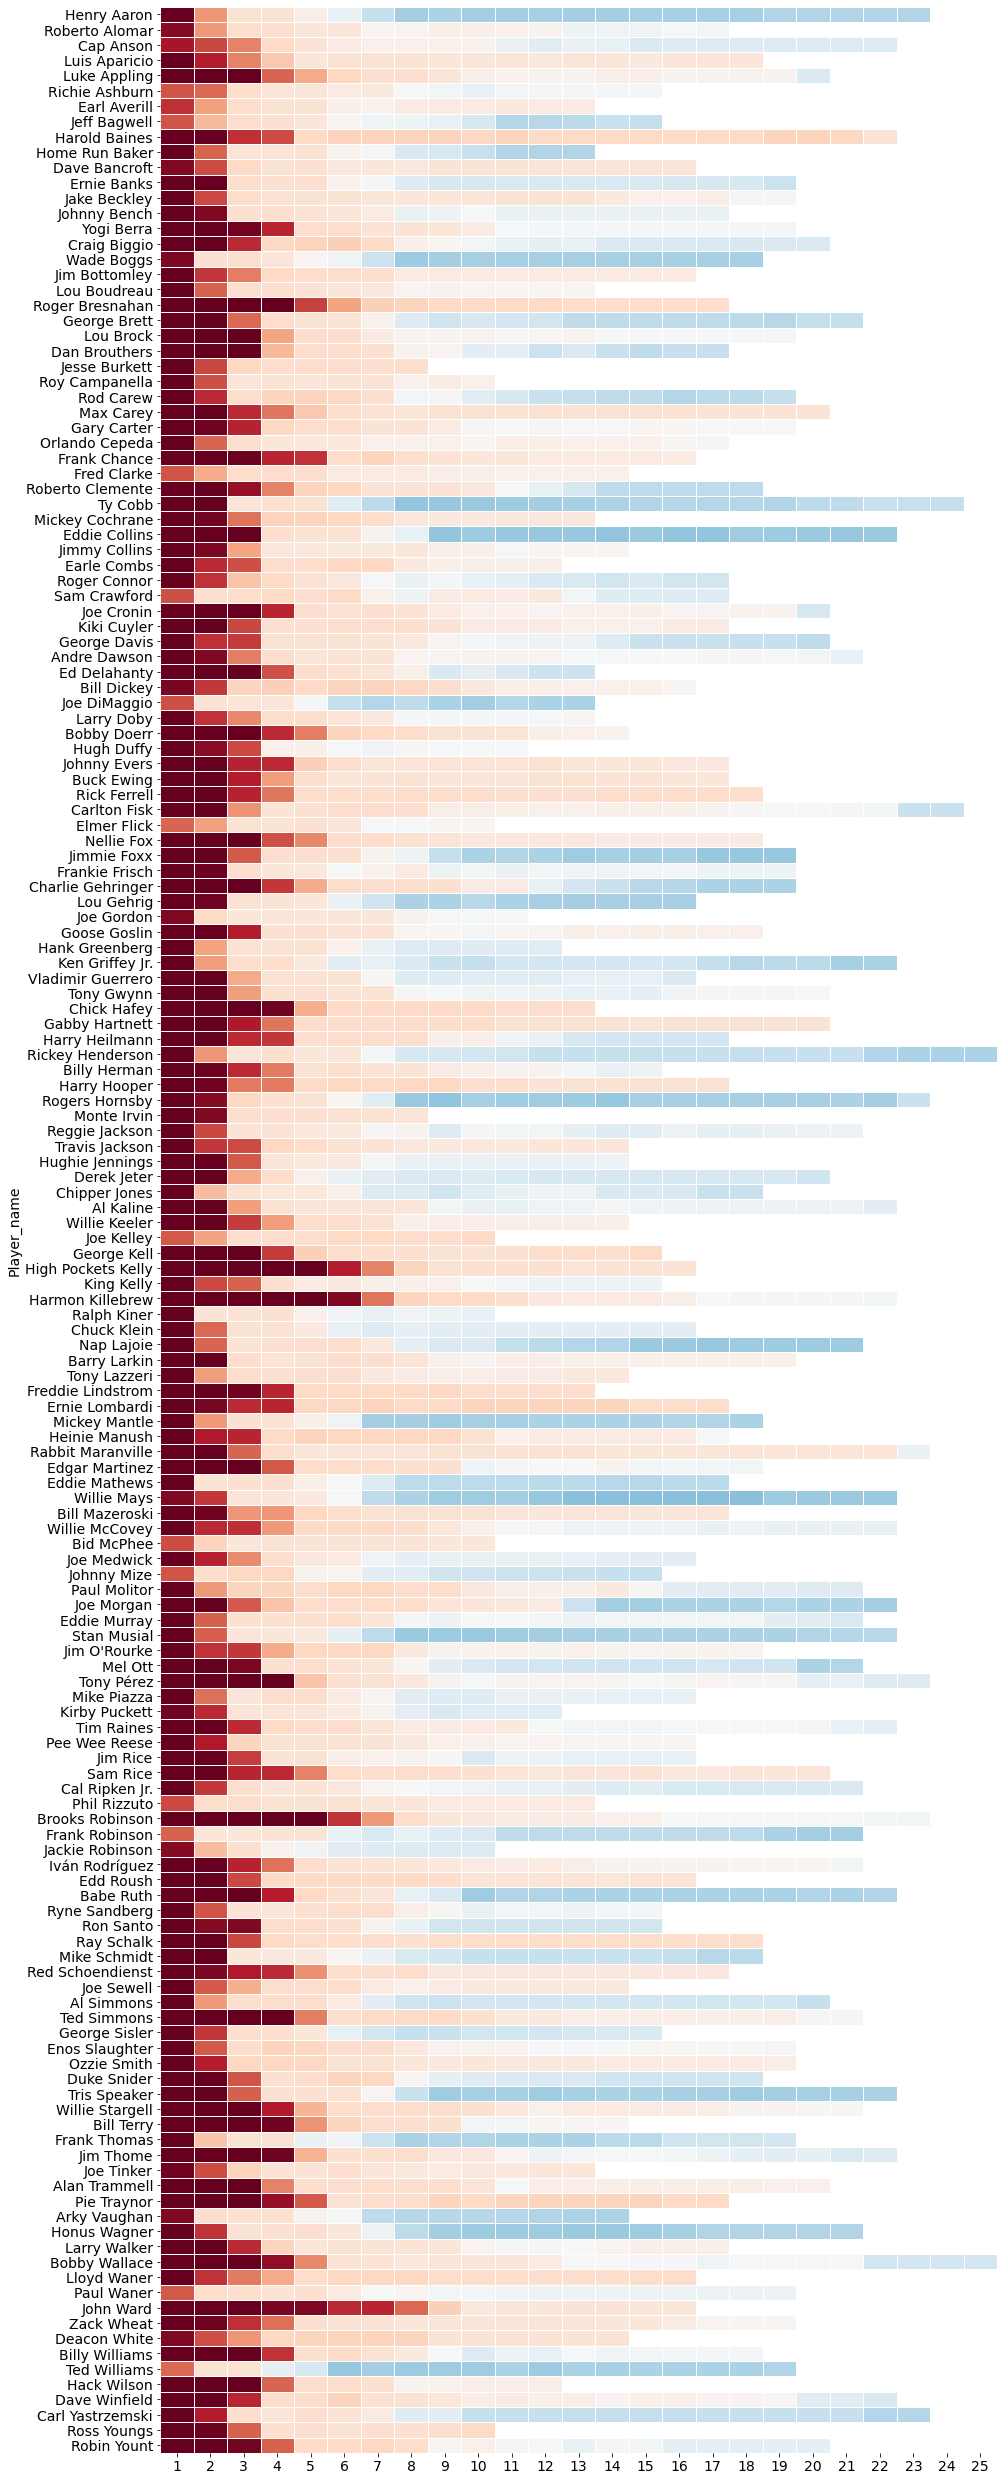

In [ ]:
playerSeasonFullValue = pd.read_csv('asset/playerSeasonFullValueHOF.csv', index_col=0)

plt.figure(figsize = (15,45))
pf = playerSeasonFullValue.reset_index()
pf.set_index('Player_name', inplace=True)
pf.drop(['Billy Hamilton', 'Sam Thompson', 'Tommy McCarthy'], axis=0, inplace=True)
pf.drop(columns = ['index', 'Player'], axis=1, inplace=True)
ax = sns.heatmap(pf, linewidths=.5,cmap="RdBu", cbar=False, center = 0.5)

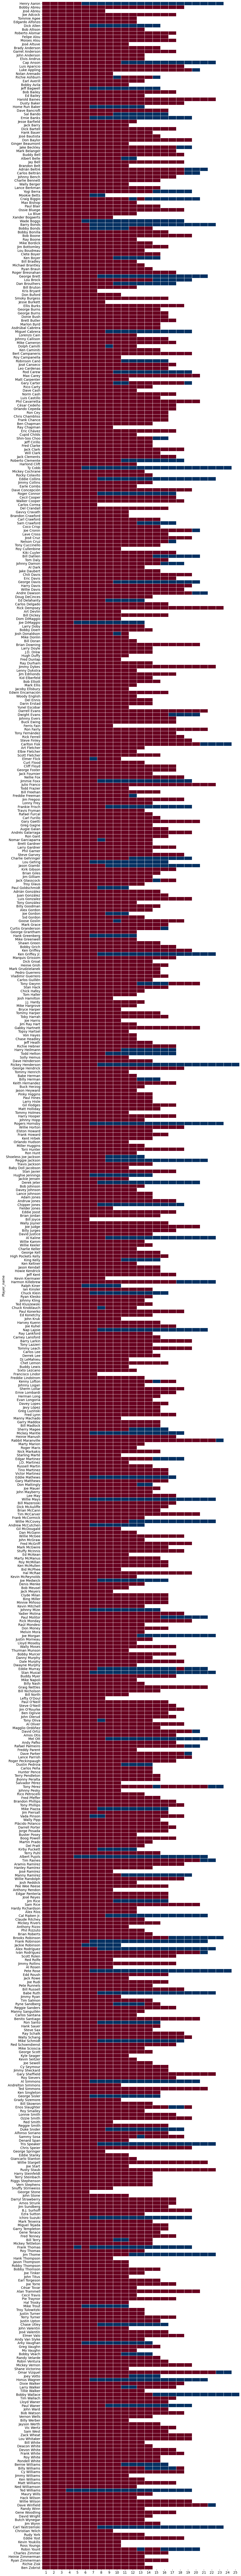

In [ ]:
playerSeasonFullBinary = pd.read_csv('asset/playerSeasonFullBinaryWAR25.csv', index_col=0)

plt.figure(figsize = (15,200))
pf = playerSeasonFullBinary.reset_index()
pf.set_index('Player_name', inplace=True)
pf.drop(columns = ['index', 'Player'], axis=1, inplace=True)
ax = sns.heatmap(pf, linewidths=.5,cmap="RdBu", cbar=False, center = 0.5)

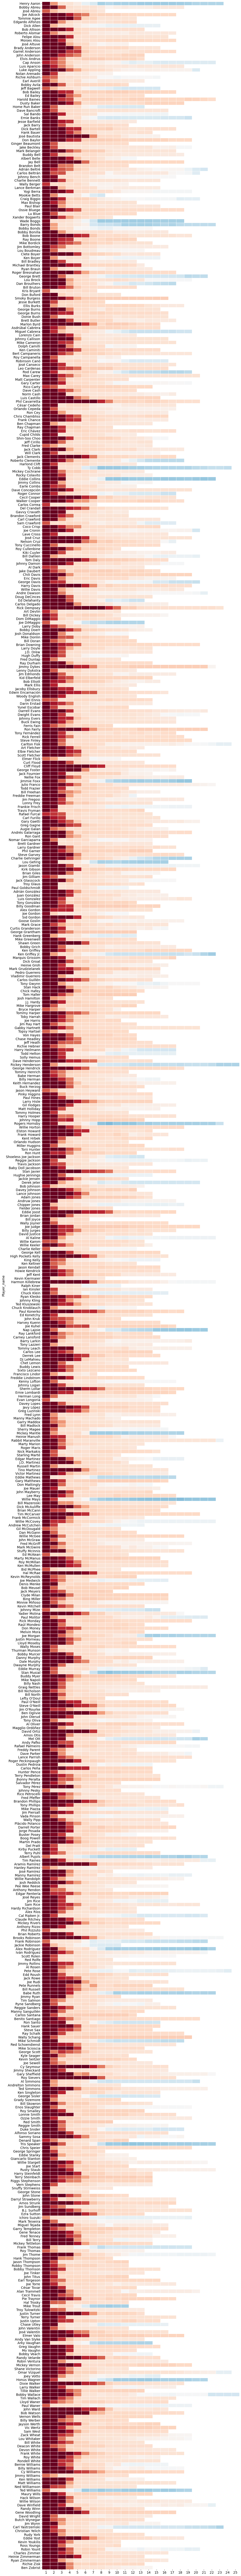

In [ ]:
playerSeasonFullValue = pd.read_csv('asset/playerSeasonFullValueWAR25.csv', index_col=0)

plt.figure(figsize = (15,200))
pf = playerSeasonFullValue.reset_index()
pf.set_index('Player_name', inplace=True)
pf.drop(columns = ['index', 'Player'], axis=1, inplace=True)
ax = sns.heatmap(pf, linewidths=.5,cmap="RdBu", cbar=False, center = 0.5)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=acb040b8-7d94-4cc1-9c6b-4e406d4a9288' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>